In [8]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/10-monkey-species/monkey_labels.txt
/kaggle/input/10-monkey-species/validation/validation/n7/n711.jpg
/kaggle/input/10-monkey-species/validation/validation/n7/n703.jpg
/kaggle/input/10-monkey-species/validation/validation/n7/n7015.jpg
/kaggle/input/10-monkey-species/validation/validation/n7/n7017.jpg
/kaggle/input/10-monkey-species/validation/validation/n7/n709.jpg
/kaggle/input/10-monkey-species/validation/validation/n7/n712.jpg
/kaggle/input/10-monkey-species/validation/validation/n7/n710.jpg
/kaggle/input/10-monkey-species/validation/validation/n7/n7012.jpg
/kaggle/input/10-monkey-species/validation/validation/n7/n713.jpg
/kaggle/input/10-monkey-species/validation/validation/n7/n7011.jpg
/kaggle/input/10-monkey-species/validation/validation/n7/n7016.jpg
/kaggle/input/10-monkey-species/validation/validation/n7/n7010.jpg
/kaggle/input/10-monkey-species/validation/validation/n7/n706.jpg
/kaggle/input/10-monkey-species/validation/validation/n7/n717.jpg
/kaggle/input/10-mon

In [9]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import sklearn
import sys 
import tensorflow as tf
import time
from tensorflow import keras

print(tf.__version__)
print(sys.version_info)
for module in mpl,np,pd,sklearn,tf,keras:
    print(module.__name__,module.__version__)
gpus = tf.config.experimental.list_physical_devices(device_type='GPU')
print(gpus)

2.1.0
sys.version_info(major=3, minor=7, micro=6, releaselevel='final', serial=0)
matplotlib 3.1.3
numpy 1.18.1
pandas 1.0.1
sklearn 0.22.2.post1
tensorflow 2.1.0
tensorflow_core.keras 2.2.4-tf
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [10]:
train_dir = "../input/10-monkey-species/training/training"
valid_dir = "../input/10-monkey-species/validation/validation"
label_file = "../input/10-monkey-species/monkey_labels.txt"
print(os.path.exists(train_dir))
print(os.path.exists(valid_dir))
print(os.path.exists(label_file))

True
True
True


In [11]:
labels = pd.read_csv(label_file,header=0)
print(labels)

   Label     Latin Name              Common Name                     \
0  n0         alouatta_palliata\t    mantled_howler                   
1  n1        erythrocebus_patas\t    patas_monkey                     
2  n2        cacajao_calvus\t        bald_uakari                      
3  n3        macaca_fuscata\t        japanese_macaque                 
4  n4       cebuella_pygmea\t        pygmy_marmoset                   
5  n5       cebus_capucinus\t        white_headed_capuchin            
6  n6       mico_argentatus\t        silvery_marmoset                 
7  n7      saimiri_sciureus\t        common_squirrel_monkey           
8  n8       aotus_nigriceps\t        black_headed_night_monkey        
9  n9       trachypithecus_johnii    nilgiri_langur                   

    Train Images    Validation Images  
0             131                  26  
1             139                  28  
2             137                  27  
3             152                  30  
4             131 

In [12]:
height =128
width = 128
channels = 3
batch_size = 64
num_classes = 10

train_datagen = keras.preprocessing.image.ImageDataGenerator(
    rescale = 1./255, # 将像素值映射到0-1之间
    rotation_range = 40, # 数据增强的方法，随即将图片进行旋转
    width_shift_range = 0.2, # 随机位移
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True, # 是否对图像进行水平翻转
    fill_mode = 'nearest' # 当图像放大时，如何进行填充
)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                   target_size=(height,width),
                                                  batch_size = batch_size,
                                                  seed = 7,
                                                  shuffle = True,
                                                  class_mode = "categorical")

valid_datagen = keras.preprocessing.image.ImageDataGenerator(
    rescale = 1./255, # 将像素值映射到0-1之间
)
valid_generator = valid_datagen.flow_from_directory(valid_dir,
                                                   target_size=(height,width),
                                                  batch_size = batch_size,
                                                  seed = 7,
                                                  shuffle = False,
                                                  class_mode = "categorical")
train_num = train_generator.samples
valid_num = valid_generator.samples
print(train_num,valid_num)

Found 1098 images belonging to 10 classes.
Found 272 images belonging to 10 classes.
1098 272


In [13]:
for i in range(2):
    x,y = train_generator.next()
    print(x.shape,y.shape)
    print(y)

(64, 128, 128, 3) (64, 10)
[[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0.

In [16]:
model = keras.models.Sequential([
    keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[width,height,channels]),
    keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[width,height,channels]),
    keras.layers.MaxPool2D(pool_size=2),

    keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'),
    keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'),
    keras.layers.MaxPool2D(pool_size=2),
    
    keras.layers.Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'),
    keras.layers.Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'),
    keras.layers.MaxPool2D(pool_size=2),
    
    keras.layers.Flatten(),
    keras.layers.Dense(128,activation='selu'),
    keras.layers.Dense(num_classes,activation='softmax')
])

model.compile(loss="categorical_crossentropy",
             optimizer="adam",
             metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 128, 128, 32)      896       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 128, 128, 32)      9248      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 64, 64, 64)        18496     
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 64, 64, 64)        36928     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 32, 32, 128)      

In [17]:
epochs = 300
history = model.fit_generator(train_generator,
                             steps_per_epoch= train_num // batch_size,
                             epochs = epochs,
                             validation_data = valid_generator,
                             validation_steps = valid_num // batch_size)


Train for 17 steps, validate for 4 steps
Epoch 1/10
17/17 [==============================] - 79s 5s/step - loss: 2.4799 - accuracy: 0.1241 - val_loss: 2.2802 - val_accuracy: 0.1797
Epoch 2/10
17/17 [==============================] - 78s 5s/step - loss: 2.2707 - accuracy: 0.1422 - val_loss: 2.2362 - val_accuracy: 0.1445
Epoch 3/10
17/17 [==============================] - 78s 5s/step - loss: 2.2855 - accuracy: 0.1325 - val_loss: 2.2714 - val_accuracy: 0.1797
Epoch 4/10
17/17 [==============================] - 78s 5s/step - loss: 2.1867 - accuracy: 0.1634 - val_loss: 2.0304 - val_accuracy: 0.2656
Epoch 5/10
17/17 [==============================] - 76s 4s/step - loss: 2.0511 - accuracy: 0.2814 - val_loss: 1.8677 - val_accuracy: 0.3125
Epoch 6/10
17/17 [==============================] - 78s 5s/step - loss: 1.9885 - accuracy: 0.2988 - val_loss: 1.9073 - val_accuracy: 0.3008
Epoch 7/10
17/17 [==============================] - 77s 5s/step - loss: 1.8988 - accuracy: 0.3075 - val_loss: 1.6330 - 

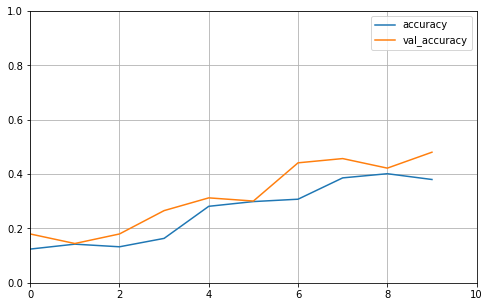

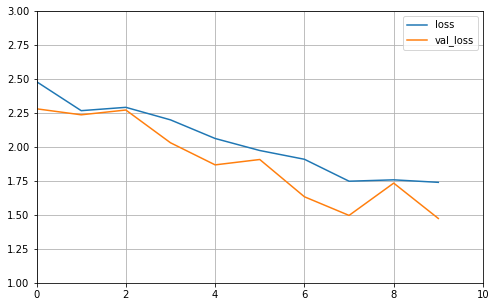

In [22]:
def plot_learning_curves(history,label,epochs,min_value,max_value):
    data = {}
    data[label] = history.history[label]
    data['val_'+label] = history.history['val_'+label]
    pd.DataFrame(data).plot(figsize=(8,5))
    plt.grid(True)
    plt.axis([0,epochs,min_value,max_value])
    plt.show()
plot_learning_curves(history,'accuracy',epochs,0,1)
plot_learning_curves(history,'loss',epochs,1,3)